# GRIP @ The Sparks Foundation

# Author : EMBARI VAMSHIKRISHNA

# Task-2 : Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually

# Importing the required libraries

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading the dataset

In [90]:
df=pd.read_csv('iris.csv')

In [91]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [92]:
df.shape

(150, 6)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [94]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [95]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [96]:
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# checking for null values

In [97]:
pd.isnull(df).sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# checking for outliers and adjusting them

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

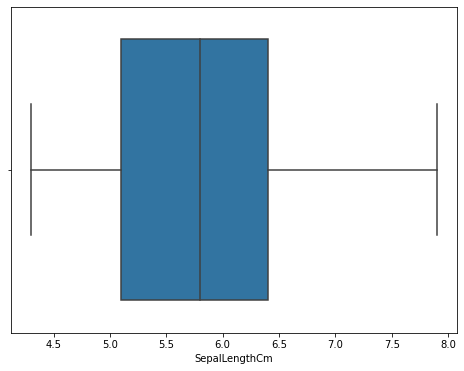

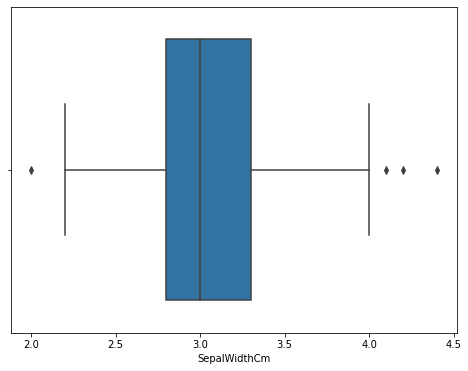

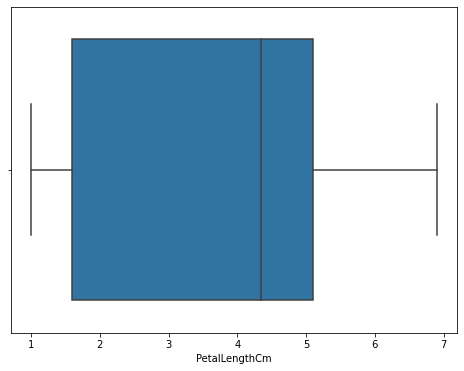

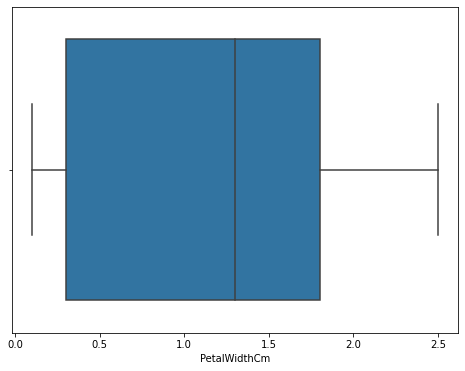

In [98]:
for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(8,6))
        sns.boxplot(df[i])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

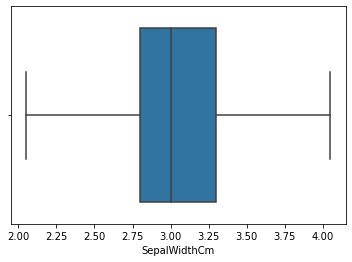

In [99]:
q1,q3=np.percentile(df['SepalWidthCm'],[25,75])
inner=q3-q1
lower=q1-(1.5*inner)
upper=q3+(1.5*inner)
df['SepalWidthCm']=df['SepalWidthCm'].apply(lambda x: upper if x>upper 
                                                      else lower if x<lower else x)

sns.boxplot(df['SepalWidthCm'])

# plotting pairplot

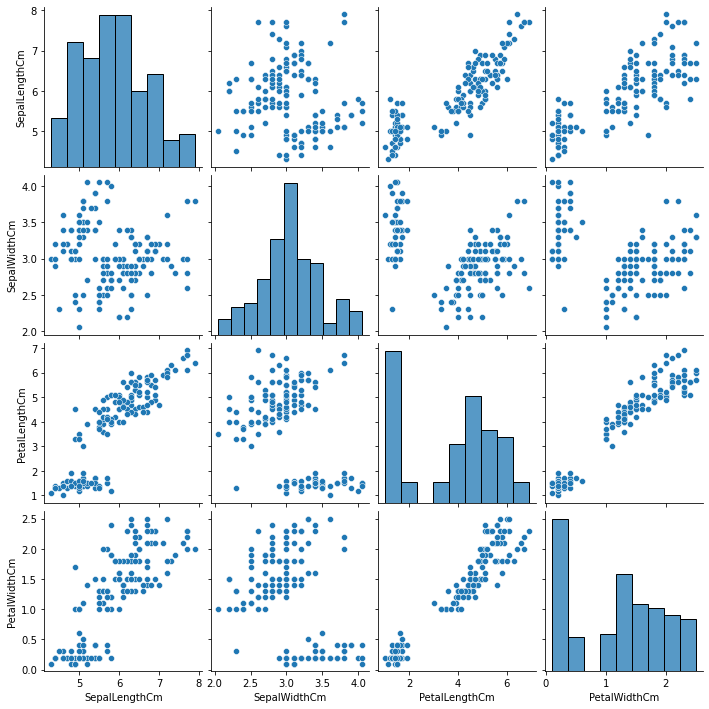

In [100]:
sns.pairplot(df)

from the above graphs we can see that petal length vs petal width is better for clustering

# importing KMeans and finding optimum clusters

In [101]:
X=df.iloc[:,0:4].values

In [102]:
from sklearn.cluster import KMeans

In [103]:
sse=[]
k_inr=range(1,11)
for k in k_inr:
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(X)
    sse.append(model.inertia_)

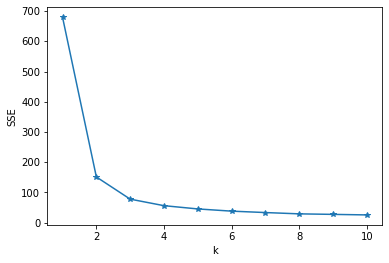

In [104]:
plt.xlabel("k")
plt.ylabel('SSE')
plt.plot(k_inr,sse,marker='*')

from the above elbow graph,we can see optimum clusters are 3

# Applying kmeans

In [127]:
model=KMeans(n_clusters=3,init='k-means++')

In [128]:
y_predicted=model.fit_predict(X)

In [129]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# visualizing clusters

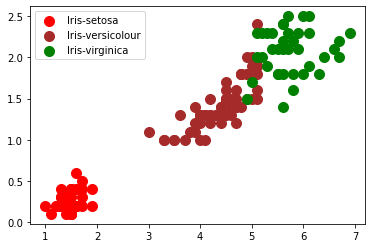

In [130]:
plt.scatter(X[y_predicted==0,2],X[y_predicted==0,3],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_predicted==1,2],X[y_predicted==1,3],s=100,c='brown',label='Iris-versicolour')
plt.scatter(X[y_predicted==2,2],X[y_predicted==2,3],s=100,c='green',label='Iris-virginica')
plt.legend()

# plotting centroids

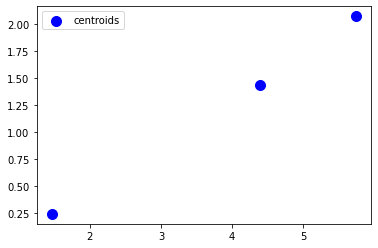

In [131]:
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],s=100,c='blue',label='centroids')
plt.legend()

# visualizing clusters with centroids

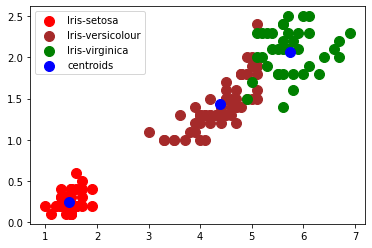

In [132]:
plt.scatter(X[y_predicted==0,2],X[y_predicted==0,3],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_predicted==1,2],X[y_predicted==1,3],s=100,c='brown',label='Iris-versicolour')
plt.scatter(X[y_predicted==2,2],X[y_predicted==2,3],s=100,c='green',label='Iris-virginica')
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],s=100,c='blue',label='centroids')
plt.legend()

# classification report

In [133]:
df['clusters']=model.labels_

In [134]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [135]:
df['clusters'].value_counts()

1    62
0    50
2    38
Name: clusters, dtype: int64

In [136]:
df['Species_encoded']=df['Species'].apply(lambda x:0 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 1)

In [137]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [138]:
from sklearn.metrics import classification_report
print(classification_report(df['Species_encoded'],df['clusters']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# confusion matrix

Text(33.0, 0.5, 'Truth')

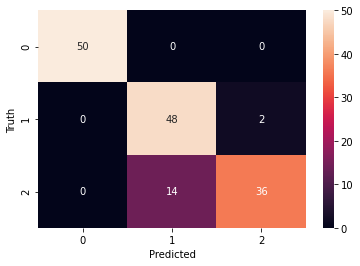

In [139]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(df['Species_encoded'],df['clusters']),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# conclusion

the optimum number of clusters are 3 and represented above visually

# Thank you